In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
gender_submission_df = pd.read_csv("gender_submission.csv")

train_head = train_df.head()
test_head = test_df.head()
gender_submission_head = gender_submission_df.head()

In [3]:
train_head

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_head

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
gender_submission_head

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
#g = sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(),cmap="BrBG",annot=True)

In [7]:
train_missing = train_df.isnull().sum()
test_missing = test_df.isnull().sum()

train_missing, test_missing

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Create a function to preprocess data
def preprocess_data(df):
    age_imputer = SimpleImputer(strategy='median')
    df['Age'] = age_imputer.fit_transform(df[['Age']])
    
    fare_imputer = SimpleImputer(strategy='median')
    df['Fare'] = fare_imputer.fit_transform(df[['Fare']])
    
    #embarked_imputer = SimpleImputer(strategy='most_frequent')
    #df['Embarked'] = embarked_imputer.fit_transform(df[['Embarked']])
    
    # new feature indicating whether a Cabin number is available
    df['Cabin_Available'] = df['Cabin'].notnull().astype(int)
    df.drop('Cabin', axis=1, inplace=True)
    
    sex_encoder = LabelEncoder()
    df['Sex'] = sex_encoder.fit_transform(df['Sex'])
    
    #df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
    
    return df

train_df_processed = preprocess_data(train_df)
test_df_processed = preprocess_data(test_df)

train_df_processed.drop('Name', axis=1, inplace=True)
test_df_processed.drop('Name', axis=1, inplace=True)

In [9]:
train_df_processed.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Available
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,0,35.0,1,0,113803,53.1000,S,1
4,5,0,3,1,35.0,0,0,373450,8.0500,S,0


In [10]:
test_df_processed.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Available
0,892,3,1,34.5,0,0,330911,7.8292,Q,0
1,893,3,0,47.0,1,0,363272,7.0000,S,0
2,894,2,1,62.0,0,0,240276,9.6875,Q,0
3,895,3,1,27.0,0,0,315154,8.6625,S,0
4,896,3,0,22.0,1,1,3101298,12.2875,S,0


In [11]:
Embarked_encoder = LabelEncoder()
test_df_processed['Embarked'] = Embarked_encoder.fit_transform(test_df_processed['Embarked'])

In [12]:
Embarked_encoder = LabelEncoder()
train_df_processed['Embarked'] = Embarked_encoder.fit_transform(train_df_processed['Embarked'])

In [13]:
train_df_processed["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [14]:
train_df_processed.drop("Ticket",axis=1,inplace=True)
test_df_processed.drop("Ticket",axis=1,inplace=True)

In [15]:
test_df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      418 non-null    int64  
 1   Pclass           418 non-null    int64  
 2   Sex              418 non-null    int32  
 3   Age              418 non-null    float64
 4   SibSp            418 non-null    int64  
 5   Parch            418 non-null    int64  
 6   Fare             418 non-null    float64
 7   Embarked         418 non-null    int32  
 8   Cabin_Available  418 non-null    int32  
dtypes: float64(2), int32(3), int64(4)
memory usage: 24.6 KB


In [16]:
train_df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Sex              891 non-null    int32  
 4   Age              891 non-null    float64
 5   SibSp            891 non-null    int64  
 6   Parch            891 non-null    int64  
 7   Fare             891 non-null    float64
 8   Embarked         891 non-null    int32  
 9   Cabin_Available  891 non-null    int32  
dtypes: float64(2), int32(3), int64(5)
memory usage: 59.3 KB


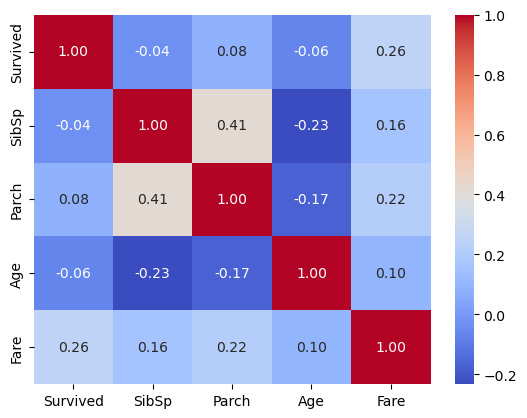

In [17]:
g = sns.heatmap(train_df_processed[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

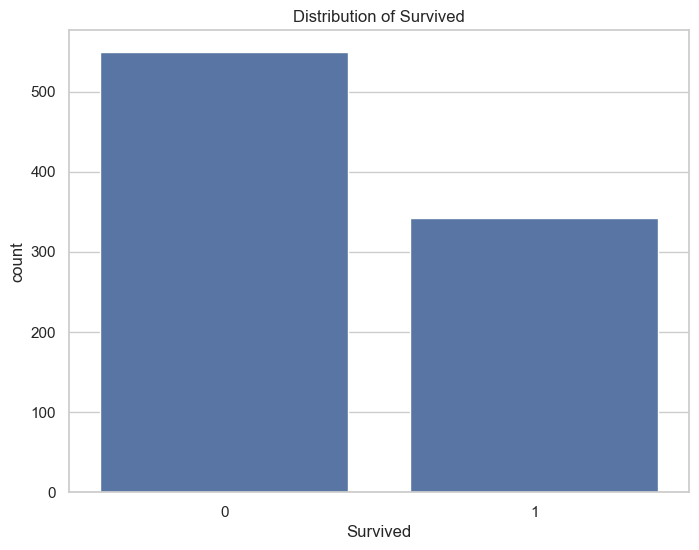

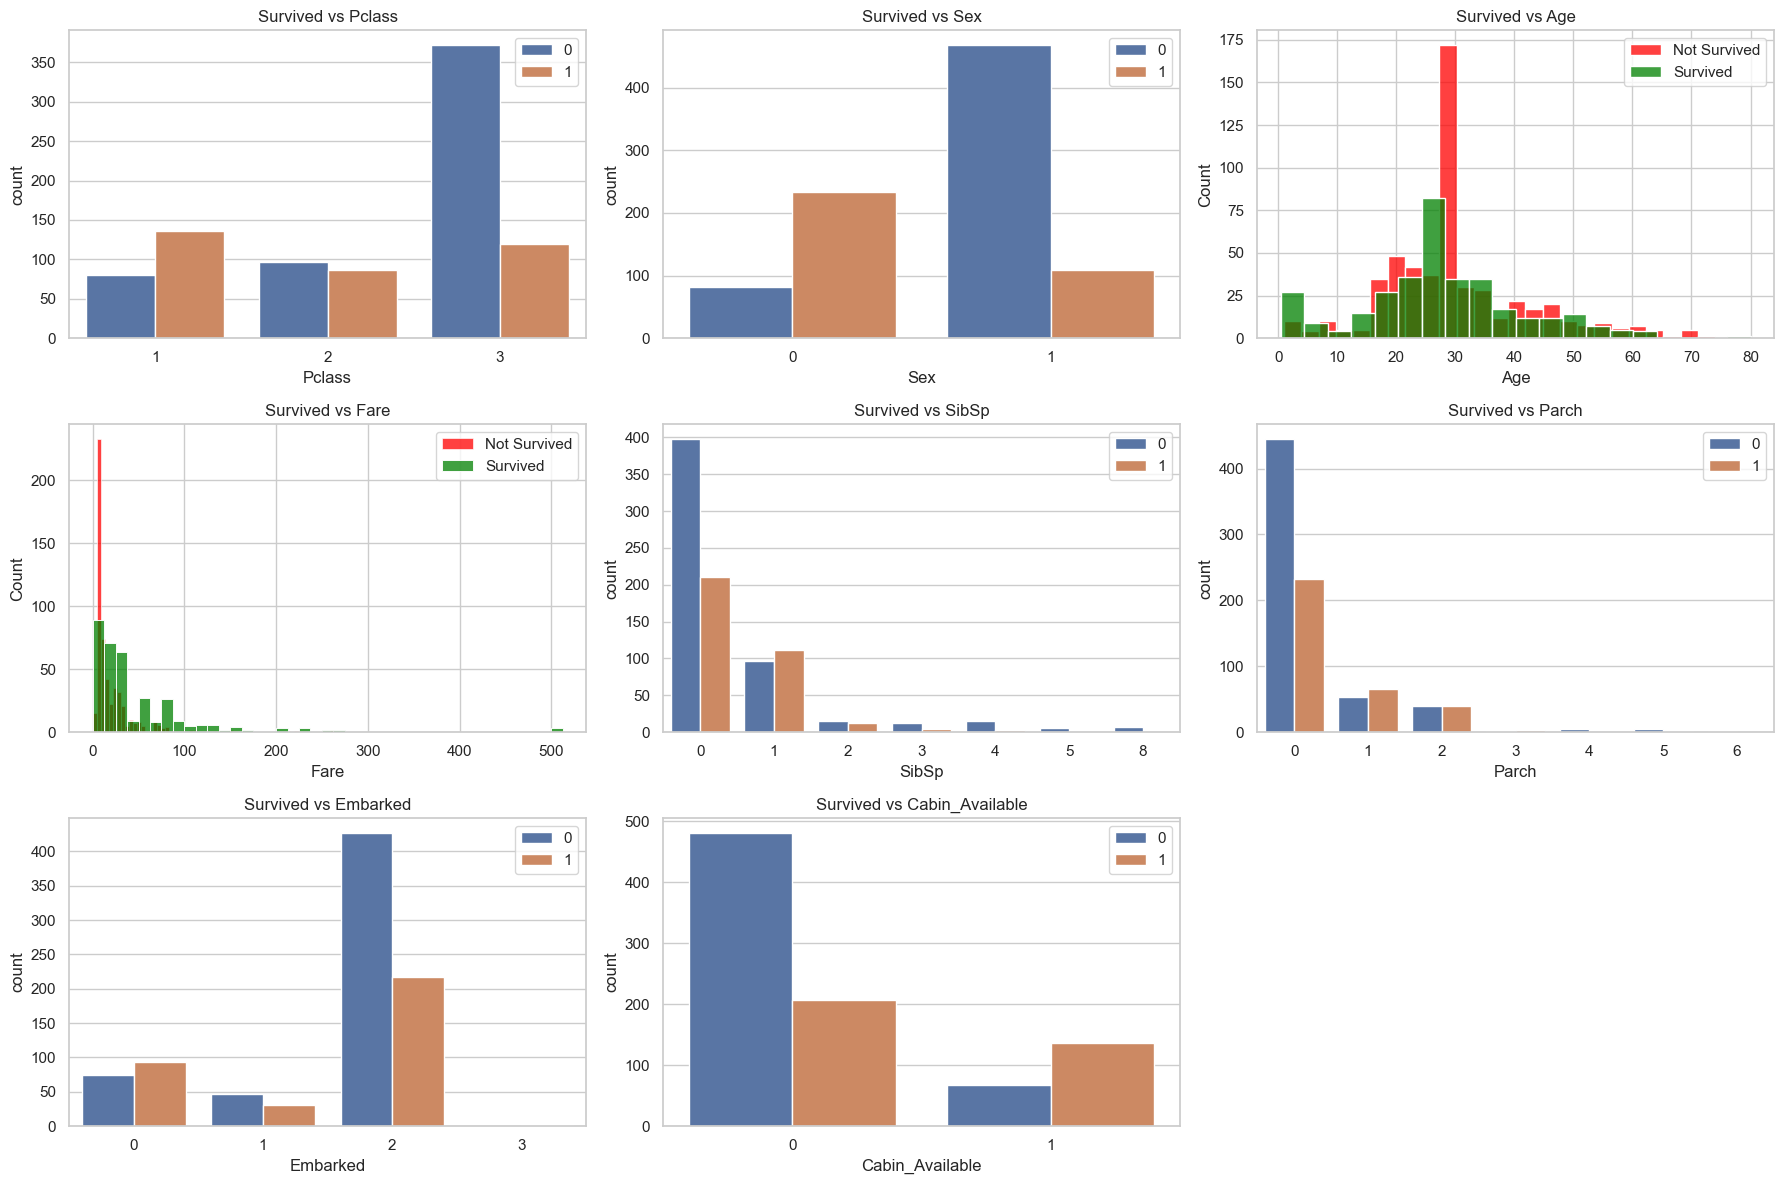

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=train_df_processed)
plt.title('Distribution of Survived')
plt.show()

features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked', 'Cabin_Available']

plt.figure(figsize=(18, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    if train_df_processed[feature].nunique() > 10:  # Continuous variable
        sns.histplot(train_df_processed[feature][train_df_processed['Survived'] == 0], kde=False, color='red', label='Not Survived')
        sns.histplot(train_df_processed[feature][train_df_processed['Survived'] == 1], kde=False, color='green', label='Survived')
    else: 
        sns.countplot(x=feature, hue='Survived', data=train_df_processed)
    plt.title(f'Survived vs {feature}')
    plt.legend()

plt.tight_layout()
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
X = train_df_processed.drop('Survived', axis=1)
y = train_df_processed['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

In [21]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8156424581005587
Confusion Matrix:
[[92 13]
 [20 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [22]:
test_predictions = model.predict(test_df_processed)

submission = pd.DataFrame({
    "PassengerId": test_df['PassengerId'],
    "Survived": test_predictions
})

In [23]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Pclass', 'Sex', 'Embarked', 'Cabin_Available']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [25]:
logreg = LogisticRegression()
rf = RandomForestClassifier(random_state=42)

logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', logreg)])

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', rf)])

In [34]:
param_grid_logreg = {
    'classifier__C': [0.1, 1.0, 10.0],
    'classifier__penalty': ['l2']
}

param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search_logreg = GridSearchCV(logreg_pipeline, param_grid_logreg, cv=5, scoring='accuracy')
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='accuracy')

In [35]:
X = train_df_processed.drop('Survived', axis=1)
y = train_df_processed['Survived']

#  data : training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
grid_search_logreg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare',
                                                                          'SibSp',
                                                                          'Parch']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Embarked',
                                                                          'Cabin_Available'])])),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.1, 1.0, 10.0],
                         'classifier__penalty': ['l2']},
             scoring='accuracy')

In [37]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare',
                                                                          'SibSp',
                                                                          'Parch']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Embarked',
                                                                          'Cabin_Available'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [38]:
best_logreg = grid_search_logreg.best_estimator_
y_pred_logreg = best_logreg.predict(X_val)
accuracy_logreg = accuracy_score(y_val, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_val, y_pred_logreg)
class_report_logreg = classification_report(y_val, y_pred_logreg)

In [39]:
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_val, y_pred_rf)
class_report_rf = classification_report(y_val, y_pred_rf)

In [40]:
print("Logistic Regression Best Params:", grid_search_logreg.best_params_)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")
print("Logistic Regression Confusion Matrix:")
print(conf_matrix_logreg)
print("Logistic Regression Classification Report:")
print(class_report_logreg)

Logistic Regression Best Params: {'classifier__C': 1.0, 'classifier__penalty': 'l2'}
Logistic Regression Accuracy: 0.8044692737430168
Logistic Regression Confusion Matrix:
[[90 15]
 [20 54]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [41]:
print("Random Forest Best Params:", grid_search_rf.best_params_)
print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)
print("Random Forest Classification Report:")
print(class_report_rf)

Random Forest Best Params: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
Random Forest Accuracy: 0.8156424581005587
Random Forest Confusion Matrix:
[[93 12]
 [21 53]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [31]:
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))

In [32]:
kfold = StratifiedKFold(n_splits=10)
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, train_df_processed.drop("Survived",axis=1), y = train_df_processed["Survived"], scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [33]:
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","LogisticRegression","DecisionTree","ExtraTrees"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

TypeError: barplot() got multiple values for argument 'data'